Loading and preprocessing data...
Splitting data into training and testing sets...
Training the Gradient Boosting model...
Evaluating the model...

--- Gradient Boosting Regressor - Evaluation Metrics ---
Mean Squared Error (MSE): 43.5920
R-squared (R2): 0.0769
Generating and saving the plot...

Plot has been saved as 'age_prediction_plot.png'


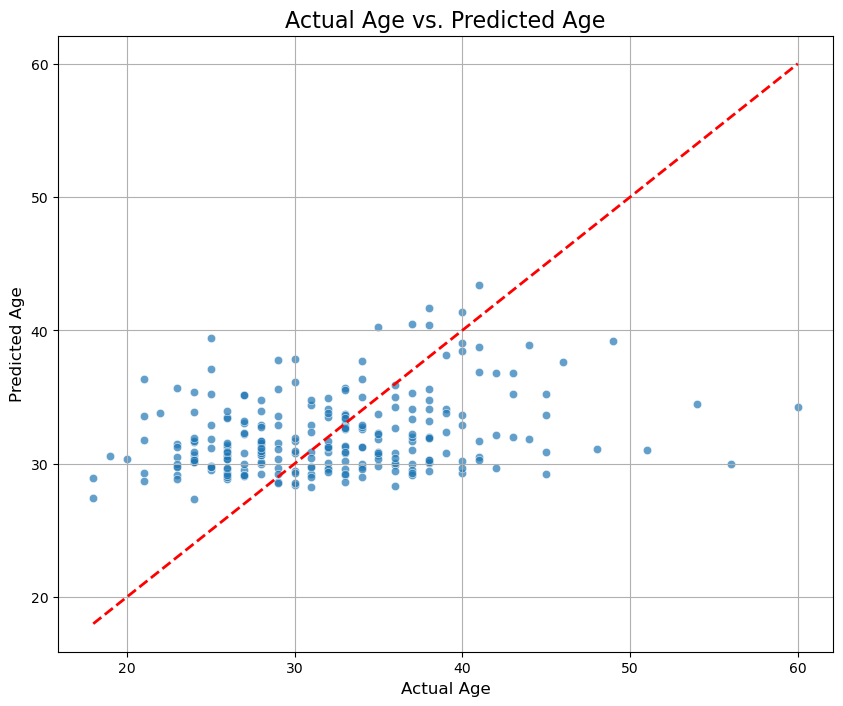

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading and preprocessing data...")
df = pd.read_csv('survey.csv')

df = df[(df['Age'] >= 18) & (df['Age'] <= 75)]

df = df.drop(['Timestamp', 'state', 'Country', 'comments'], axis=1)

y = df['Age']
X = df.drop('Age', axis=1)


X = pd.get_dummies(X, drop_first=True)

print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training the Gradient Boosting model...")

pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor(random_state=110))
])


pipeline_gb.fit(X_train, y_train)

print("Evaluating the model...")
y_pred = pipeline_gb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Gradient Boosting Regressor - Evaluation Metrics ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


print("Generating and saving the plot...")
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual Age vs. Predicted Age', fontsize=16)
plt.xlabel('Actual Age', fontsize=12)
plt.ylabel('Predicted Age', fontsize=12)
plt.grid(True)
plt.savefig('age_prediction_plot.png')

print("\nPlot has been saved as 'age_prediction_plot.png'")

In [13]:
import pickle

In [14]:
with open("regression_model.pkl",'wb') as f:
    pickle.dump(pipeline_gb,f)